# Laboratorio 1 Aprendizaje de Máquina

Integrantes del grupo:
1. Emmanuel Blanco - 202312743
2. Juan David Guzmán - 202320890

## Exploración de Datos

Para poder hacer la exploración de los datos primero importamos todas la librerías que nos pueden resultar útiles:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

A continuación incluimos las versiones de las librerías que empleamos:

In [2]:
from importlib.metadata import version
print(f"Versión de Pandas: {version('pandas')}")
print(f"Versión de Matplotlib: {version('matplotlib')}")
print(f"Versión de Seaborn: {version('seaborn')}")
print(f"Versión de Scikit learn: {version('scikit-learn')}")

Versión de Pandas: 2.2.3
Versión de Matplotlib: 3.10.0
Versión de Seaborn: 0.13.2
Versión de Scikit learn: 1.6.1


En el siguiente espacio para código desplegamos la información contenida en el diccionario de datos para informanos sobre lo que significan los atributos de los datos

In [3]:
#Cargamos en diccionario de datos
dict_datos = pd.read_excel("./data/DiccPacientes.xlsx")
pd.set_option('display.max_colwidth', None)
dict_datos

,Nombre Columna,Tipo de dato,Comentarios
0,Patient ID,String,Identificador del paciente
1,Date of Service,Date,Fecha de la atención
2,Sex,String,"Sexo (Femenino, Masculino)"
3,Age,Integer,Edad
4,Weight (kg),Float,Peso
5,Height (m),Float,Altura
6,BMI,Float,Índice de masa corporal
7,Abdominal Circumference (cm),Float,Circunferencia abdominal
8,Blood Pressure (mmHg),String,"Presión sanguínea, de la forma ""<Presión arterial sistólica>/<Presión arterial diastólica>"""
9,Total Cholesterol (mg/dL),Float,Colesterol total


Ahora pasamos a cargar los datos de prueba dentro de un dataframe para poder revisarlos e identificar detalles que debamos corregir o preparar para luego pasárselos al modelo

In [4]:
training_data = pd.read_csv("./data/Datos_Lab_1.csv")
training_data

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
0,isDx5313,"November 08, 2023",M,44.0,114.300,1.720,38.600,100.000,112/83,228.0,...,High,N,172.000,0.581,112.0,83.0,Hypertension Stage 1,121.0,19.880,HIGH
1,LHCK2961,20/03/2024,F,57.0,92.923,1.842,33.116,106.315,101/91,158.0,...,High,Y,184.172,0.577,101.0,91.0,Hypertension Stage 2,57.0,16.833,INTERMEDIARY
2,WjVn1699,2021-05-27,F,NaN,73.400,1.650,27.000,78.100,90/74,135.0,...,High,N,165.000,0.473,90.0,74.0,Normal,45.0,12.600,LOW
3,dCDO1109,"April 18, 2022",F,35.0,113.300,1.780,35.800,79.600,92/89,158.0,...,Moderate,Y,178.000,0.447,92.0,89.0,Hypertension Stage 1,94.0,14.920,HIGH
4,pnpE1080,01/11/2024,F,48.0,102.200,1.750,33.400,106.700,121/68,207.0,...,Low,Y,175.000,0.610,121.0,68.0,Elevated,128.0,18.870,HIGH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634,mrzf5858,"May 21, 2021",F,35.0,77.600,1.780,24.500,84.600,124/90,143.0,...,Low,N,178.000,0.475,124.0,90.0,Hypertension Stage 2,37.0,13.960,LOW
1635,nPnN5477,12/04/2022,F,35.0,92.005,1.726,NaN,98.692,95/111,156.0,...,High,N,172.602,0.572,95.0,111.0,Hypertension Stage 2,46.0,14.316,LOW
1636,ePpS4710,12/04/2022,M,48.0,50.100,1.770,16.000,104.100,146/95,210.0,...,Low,Y,177.000,0.588,146.0,NaN,Hypertension Stage 2,110.0,NaN,HIGH
1637,QSFT6794,"September 06, 2025",M,49.0,NaN,1.630,23.100,93.800,144/91,191.0,...,Moderate,Y,163.000,0.575,144.0,NaN,Hypertension Stage 2,82.0,17.640,HIGH


Información sobre el tamaño del dataframe resultante:

In [5]:

print(f"Número de registros: {training_data.shape[0]}")
print(f"Número de variables: {training_data.shape[1]}")

Número de registros: 1639
Número de variables: 24


Tipo de los datos de las columnas de nuestro dataframe:

In [6]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639 entries, 0 to 1638
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient ID                    1639 non-null   object 
 1   Date of Service               1639 non-null   object 
 2   Sex                           1639 non-null   object 
 3   Age                           1571 non-null   float64
 4   Weight (kg)                   1566 non-null   float64
 5   Height (m)                    1578 non-null   float64
 6   BMI                           1586 non-null   float64
 7   Abdominal Circumference (cm)  1578 non-null   float64
 8   Blood Pressure (mmHg)         1639 non-null   object 
 9   Total Cholesterol (mg/dL)     1571 non-null   float64
 10  HDL (mg/dL)                   1557 non-null   float64
 11  Fasting Blood Sugar (mg/dL)   1585 non-null   float64
 12  Smoking Status                1639 non-null   object 
 13  Dia

Descripción de los datos

In [7]:
training_data.describe()

,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Total Cholesterol (mg/dL),HDL (mg/dL),Fasting Blood Sugar (mg/dL),Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Estimated LDL (mg/dL),CVD Risk Score
count,1571.000000,1566.000000,1578.000000,1586.000000,1578.000000,1571.000000,1557.000000,1585.000000,1571.000000,1563.000000,1578.000000,1554.000000,1582.000000,1610.000000
mean,46.803186,85.666006,1.757439,28.424744,91.538861,199.043673,56.183558,117.836860,175.770082,0.522440,125.632637,82.887536,113.235896,18.227281
std,13.039479,21.712504,0.118012,7.309275,13.427985,59.388670,16.721702,32.379634,11.695880,0.085692,22.577463,15.503625,61.435291,10.767666
min,6.134000,13.261000,1.371000,4.317000,49.542000,-1.256000,0.008000,15.306000,136.498000,0.250000,49.914000,31.720000,-92.055000,-20.057000
25%,37.000000,67.100000,1.666500,22.600000,79.700000,150.000000,42.000000,92.000000,167.000000,0.453000,108.000000,71.000000,62.000000,15.150000
50%,46.000000,86.314000,1.760000,28.000000,91.200000,199.000000,56.000000,115.000000,176.000000,0.519000,125.000000,82.000000,112.000000,16.967000
75%,55.000000,104.801500,1.850000,33.963000,102.267250,250.000000,70.000000,139.000000,185.000000,0.582000,141.000000,93.000000,159.000000,18.900000
max,89.420000,158.523000,2.146000,53.028000,136.336000,385.679000,110.315000,219.667000,214.394000,0.804000,202.711000,134.066000,317.314000,114.980000


ESPERAR A REVISIÓN DE RANGOS
En la columna edad el mínimo y el máximo aparecen como decimales, pero el diccionario los describe como enteros. Habría que revisar si hay otros datos similares.

En mínimo en el colesterol total es negativo, podría no ser válido.

Los mínimos de Estimated LDL y CVD Risk Score también son negativos, posiblemente no sean válidos

Podemos ver que el conteo de algunas columnas resulta distinta de 1639, lo que indica falta de datos en algunas columnas. Con base en eso nos preocupa saber qué tantos datos nos hacen falta:

In [9]:
porcentajes_NaN = (training_data.isnull().sum()/(training_data.shape[0]*100)).sort_values(ascending=False)
info_faltante = pd.DataFrame({
    'Columna':porcentajes_NaN.index,
    'Total de datos faltantes':training_data.isnull().sum()[porcentajes_NaN.index].values,
    '%':porcentajes_NaN.values
})
info_faltante[info_faltante['Total de datos faltantes']>0]

,Columna,Total de datos faltantes,%
0,Diastolic BP,85,0.000519
1,HDL (mg/dL),82,0.000500
2,Waist-to-Height Ratio,76,0.000464
3,Weight (kg),73,0.000445
4,Total Cholesterol (mg/dL),68,0.000415
5,Age,68,0.000415
6,Height (cm),68,0.000415
7,Height (m),61,0.000372
8,Abdominal Circumference (cm),61,0.000372
9,Systolic BP,61,0.000372


Revisamos si hay ids duplicados en nuestros datos:

In [10]:
dup_counts = (training_data["Patient ID"].value_counts().loc[lambda s: s > 1].sort_values(ascending=False))
for id_, n in dup_counts.items():
    print(f"Id={id_} → {n} apariciones")

if dup_counts.sum() == 0:
    print("No hay duplicados")

Id=AhYt1346 → 3 apariciones
Id=RlsB8509 → 3 apariciones
Id=RwGu5647 → 3 apariciones
Id=dJuC5084 → 3 apariciones
Id=YLCe2926 → 3 apariciones
Id=dSiv4949 → 3 apariciones
Id=pEpZ9034 → 3 apariciones
Id=STpP5810 → 3 apariciones
Id=DhUJ7239 → 3 apariciones
Id=gdBF9655 → 3 apariciones
Id=INdI1482 → 3 apariciones
Id=lqUc7918 → 3 apariciones
Id=CDsa2651 → 3 apariciones
Id=FTEC4446 → 3 apariciones
Id=xbYu9929 → 3 apariciones
Id=cUUw7860 → 3 apariciones
Id=XUjh9519 → 3 apariciones
Id=miQs7675 → 3 apariciones
Id=fHqx3420 → 3 apariciones
Id=svjU9851 → 3 apariciones
Id=FnQr5343 → 3 apariciones
Id=dNyM1057 → 3 apariciones
Id=kajW6905 → 3 apariciones
Id=DxSq2036 → 3 apariciones
Id=ZDBx7052 → 3 apariciones
Id=Uinq3357 → 3 apariciones
Id=UIWC3599 → 3 apariciones
Id=NGwd5164 → 3 apariciones
Id=GPCF6283 → 3 apariciones
Id=xFVW5778 → 3 apariciones
Id=KiRC8867 → 3 apariciones
Id=CYeS2965 → 3 apariciones
Id=KXhc1181 → 3 apariciones
Id=HVVR3121 → 3 apariciones
Id=kijK0146 → 3 apariciones
Id=Uexs7461 → 3 apar

Ahora vamos a hacer el conteo de qué tantos ids repetidos tenemos:

In [13]:
duplicados_id = training_data['Patient ID'].duplicated().sum()
print(f"Número de Patient IDs duplicados:",duplicados_id)

Número de Patient IDs duplicados: 263


Ahora vemos en detalle uno de los ids repetidos:

In [14]:
dup_table = training_data[training_data['Patient ID'] == "AhYt1346"].copy()
dup_table

,Patient ID,Date of Service,Sex,Age,Weight (kg),Height (m),BMI,Abdominal Circumference (cm),Blood Pressure (mmHg),Total Cholesterol (mg/dL),...,Physical Activity Level,Family History of CVD,Height (cm),Waist-to-Height Ratio,Systolic BP,Diastolic BP,Blood Pressure Category,Estimated LDL (mg/dL),CVD Risk Score,CVD Risk Level
17,AhYt1346,09-28-2020,M,41.0,71.3,1.73,23.8,107.9,139/61,253.0,...,Low,Y,173.0,NaN,139.0,NaN,Hypertension Stage 1,146.0,16.77,HIGH
1227,AhYt1346,09-28-2020,M,41.0,71.3,1.73,23.8,107.9,139/61,253.0,...,Low,Y,173.0,NaN,139.0,NaN,Hypertension Stage 1,146.0,-13.09,HIGH
1584,AhYt1346,09-28-2020,M,41.0,71.3,1.73,23.8,107.9,139/61,253.0,...,Low,Y,173.0,NaN,139.0,NaN,Hypertension Stage 1,146.0,16.77,HIGH


Se puede ver que en las repeticiones no hay muchos cambios en los campos, salvo por algunas discrepancias con el CVD Risk Score. En esta situación lo mejor sería conservar una de estas filas

Como vimos con los ids, parece que hay columnas repetidas. Para eso vamos a ver qué tantas columnas están duplicadas:

In [15]:
# Verificar registros duplicados
duplicados = training_data.duplicated().sum()
print(f"Número de registros duplicados:", duplicados)

Número de registros duplicados: 151


Ahora veamos como se relacionan las distintas variables con un mapa de calor:

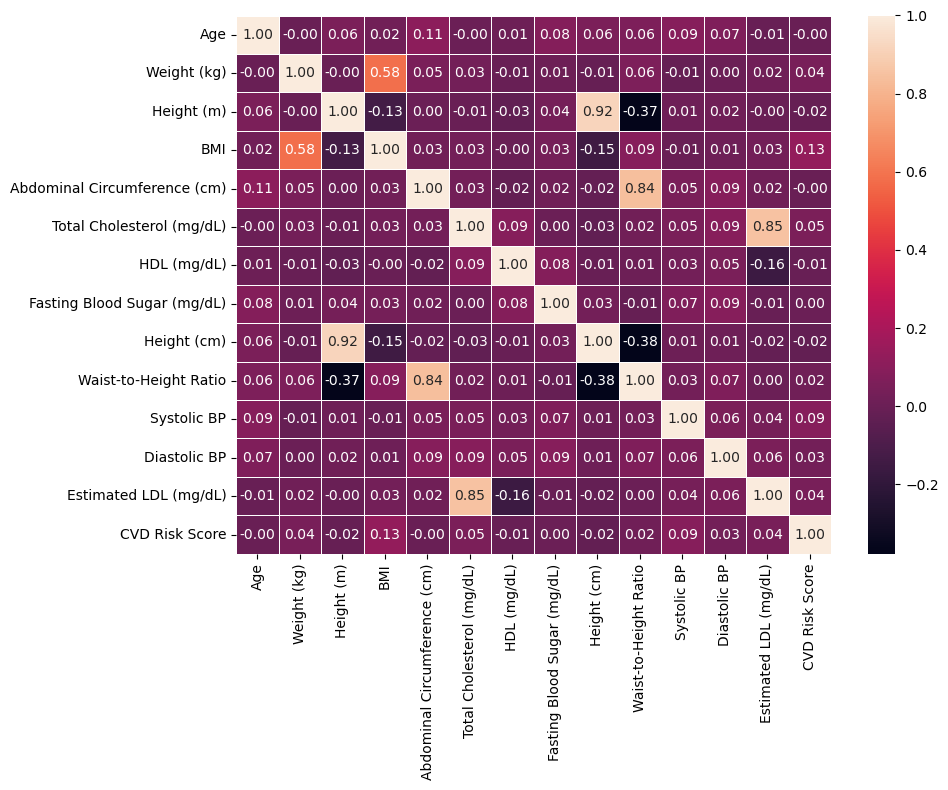

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(training_data.corr(numeric_only=True), annot=True, fmt=".2f", annot_kws={"size": 10},linewidths=0.5)
plt.tight_layout()
plt.show()


Ahora identifiquemos las variables que mejor se relacionan con CVD Risk Score:

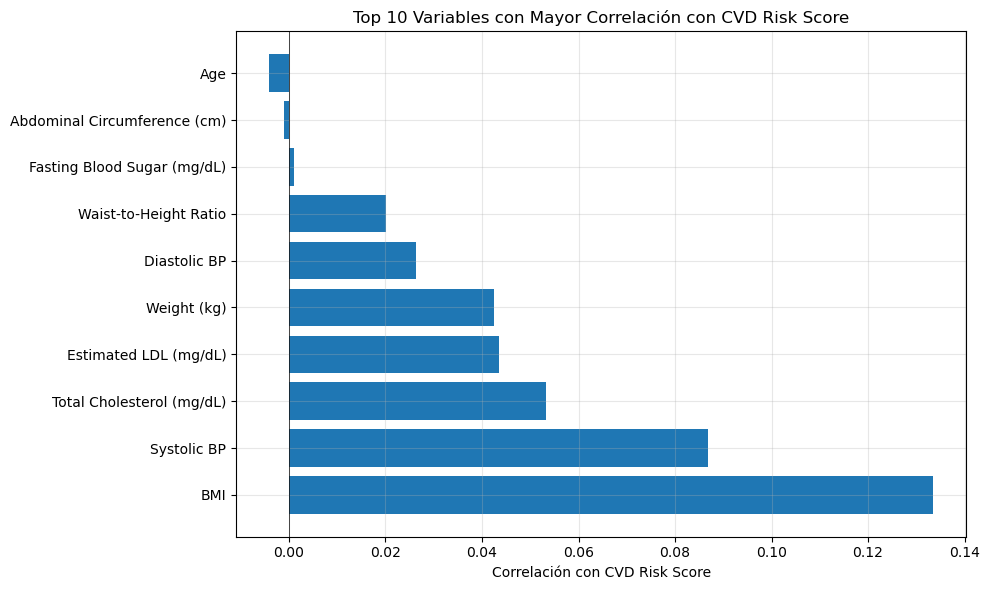

In [18]:
# Calcular correlación con CVD Risk Score
correlations = training_data.corr(numeric_only=True)['CVD Risk Score'].sort_values(ascending=False)
top_correlations = correlations[1:11]  # Top 10 (excluyendo la variable objetivo misma)
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_correlations)), top_correlations.values)
plt.yticks(range(len(top_correlations)), top_correlations.index)
plt.xlabel('Correlación con CVD Risk Score')
plt.title('Top 10 Variables con Mayor Correlación con CVD Risk Score')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

De acuerdo con lo que nos muestra en el heatmap y este gráfico de barras podemos ver que la variable que mejor se relaciona con CVD Risk Score es BMI, por lo que es una variable que seguramente debamos incluir en nuestros modelos. En cuanto al resto habrá que ver como se relacionan entre sí para ver cual podría ser la mejor a añadir en el modelo.

Ahora veremos como se relacionan los datos de las variables que identificamos antes con los de nuestra variable de interés:

<Axes: xlabel='Age', ylabel='CVD Risk Score'>

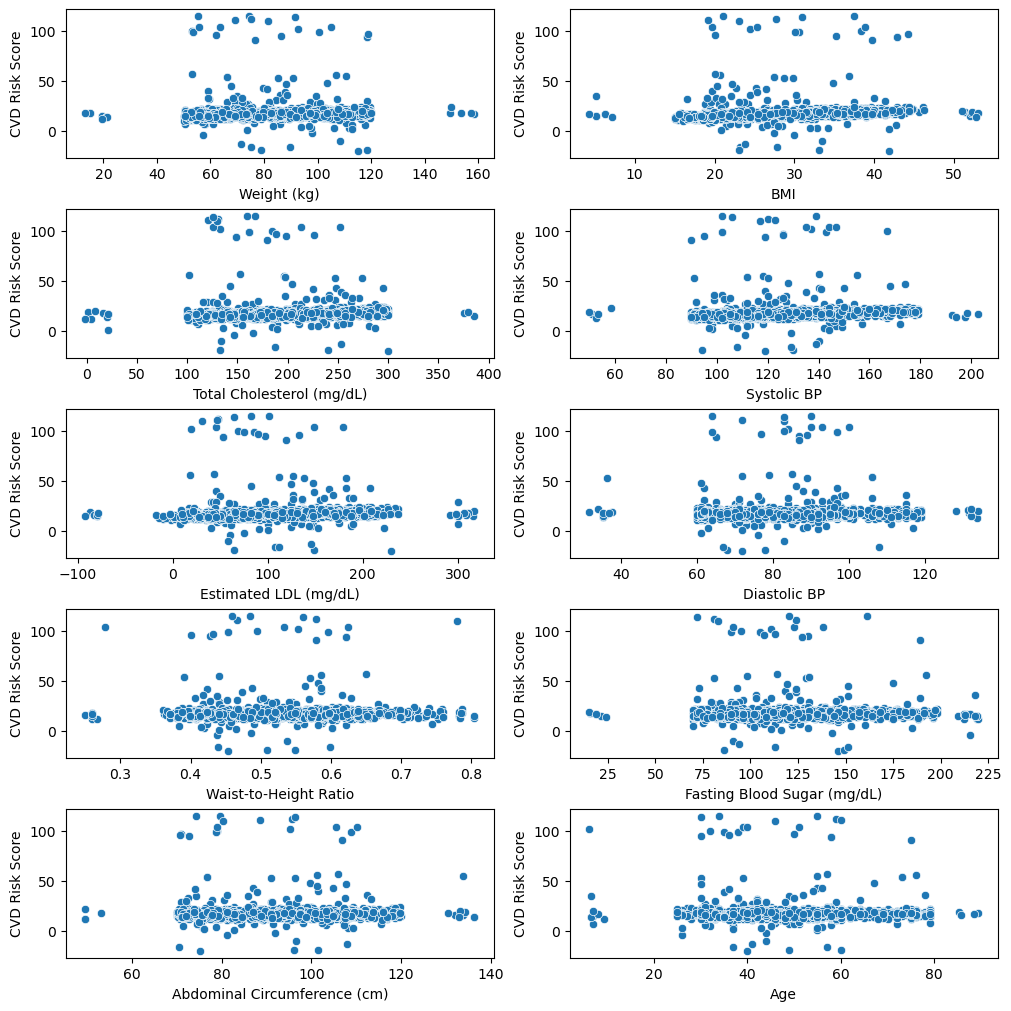

In [23]:
fig, ax = plt.subplots(5,2,layout="constrained",figsize=(10,10))
#Weight y CVD Score
sns.scatterplot(training_data,x="Weight (kg)",y="CVD Risk Score",ax=ax[0][0])
#BMI y CVD Risk Score
sns.scatterplot(training_data,x="BMI",y="CVD Risk Score",ax=ax[0][1])
#Total Cholesterol y CVD Risk Score
sns.scatterplot(training_data,x="Total Cholesterol (mg/dL)",y="CVD Risk Score",ax=ax[1][0])
#Systolic BP y CVD Score
sns.scatterplot(training_data,x="Systolic BP",y="CVD Risk Score",ax=ax[1][1])
#Estimated LDL y CVD Score
sns.scatterplot(training_data,x="Estimated LDL (mg/dL)",y="CVD Risk Score",ax=ax[2][0])
# Diastolic BP
sns.scatterplot(training_data,x="Diastolic BP",y="CVD Risk Score",ax=ax[2][1])
# Waist-to-Height ratio
sns.scatterplot(training_data,x="Waist-to-Height Ratio",y="CVD Risk Score",ax=ax[3][0])
# Fasting Blood Sugar
sns.scatterplot(training_data,x="Fasting Blood Sugar (mg/dL)",y="CVD Risk Score",ax=ax[3][1])
#Abdominal circumference
sns.scatterplot(training_data,x="Abdominal Circumference (cm)",y="CVD Risk Score",ax=ax[4][0])
#Age
sns.scatterplot(training_data,x="Age",y="CVD Risk Score",ax=ax[4][1])

## Preparación de datos

1. En este caso se eliminan las filas duplicadas del DataFrame `training_data` basándonos en la columna "Patient ID" (ID del paciente) y conservando solo la primera aparición para garantizar que los registros de los pacientes sean únicos. Pero para hacer eso se usara el metodo drop_duplicates() del DataFrame `training_data`.

Y pues támbien procedemos a quitar filas donde no hay CVD Risk Score

In [37]:
training_data = pd.read_csv("./data/Datos_Lab_1.csv")
data = training_data.drop_duplicates(subset='Patient ID', keep='last')
print(f"Después de quitar duplicados: {data.shape[0]}")

data = training_data.dropna(subset=['CVD Risk Score'])
print(f"Después de quitar nulos en objetivo: {data.shape[0]}")

Después de quitar duplicados: 1376
Después de quitar nulos en objetivo: 1610


2. Separamos X e y, y hacemos el split 75/25 con `random_state=42`.
 Y aca lo que buscamos es separar los datos para poder evaluar bien el modelo.

 Lo primero es que debemos separar la variable que queremos predecir (CVD Risk Score) del resto de variables. También quitamos CVD Risk Level porque es básicamente lo mismo que el score pero en categorías, entonces dejarlo sería como darle la respuesta al modelo.

Después nos toca dividir todo en dos partes: 75% para entrenar el modelo y 25% para probarlo. Usamos random_state=42 para que la división siempre sea la misma y los resultados sean reproducibles

In [ ]:
target = 'CVD Risk Score'
data_train = pd.read_csv("./data/Datos_Lab_1.csv")
data_test = pd.read_csv("./data/Datos_Test_Lab_1.csv")
x_train = data_train.drop(columns=[target, 'CVD Risk Level'])
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

In [ ]:
print(f"Train: {X_train.shape}")
print(f"Test: {X_test.shape}")

## Modelo 1

Para este primer modelo debemos hacer los siguiente procedimientos sobre los datos:

1. Eliminar las columnas que resultan redundantes con otras y que no son de interés
2. Corregir los valores negativos con su valor absoluto (para datos cuantitativos)
3. Imputar la media en las filas que haga falta
4. Escalar las variables numéricas
5. Imputar el valor más común en las filas de variables cualitativas con valores nulos
6. Codificar las variables cualitativas que nos sean de interés

#### PASO 1: Eliminar las columnas redundantes y que no consideraremos

In [ ]:
def drop_cols(df):
    cols_to_drop = ['Patient ID', 'Date of Service', 'Height (m)', 'Blood Pressure (mmHg)', 'CVD Risk Level']
    df = df.drop(columns=cols_to_drop)
    return df

#Este transformación la hacemos para incluirlo en el pipeline como paso
dropper = FunctionTransformer(drop_cols)

#### PASO 2: Corregir valores negativos

En este le sacamos valor absoluto a los valores en las filas que tengan variables cuantitativas con valor negativo (los cuales en este contexto no son válidos):

In [ ]:
def quitar_negativos(df):
    cuantitativos = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    for col in cuantitativos:
        df[col] = df[col].abs()
    
    return df

no_negatives = FunctionTransformer(quitar_negativos)

#### PASOS 3 y 4: Imputar la media en las filas donde una columna tenga datos nulos y escalar las variables

Para estos pasos usaremos un simpleImputer de sci-kit learn con la estrategia de mean para la imputación y un StandardScaler para el escalado. En este punto haremos uso de otro pipeline para tratar solo datos cuantitativos:

In [ ]:
cuantitative_trans = Pipeline(steps=[
    ('Quitar negativos',no_negatives),
    ('Imputar media',SimpleImputer(strategy="mean")),
    ('Escalamiento de variables',StandardScaler())
])

#### PASOS 5 y 6: Imputación en columnas cualitativas y codificación de las variables cualitativas

En esta parte crearemos otro pipeline para procesar solo los datos cualitativos:

In [ ]:
cualitative_trans = Pipeline(steps=[
    ('Imputar',SimpleImputer(strategy="most_frequent")),
    ('codificacion',OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

## Pipeline final del modelo 1

In [ ]:
preprocesor_model1 = ColumnTransformer(transformers=[
    ('num',cuantitative_trans),
    ('cat',cualitative_trans)
])

model1_pipeline = Pipeline(steps=[
    ('dropper',dropper),
    ('preprocesor',preprocesor_model1),
    ('regresion',LinearRegression())
])

from sklearn import set_config
set_config(display="diagram")

model1_pipeline

## Modelo 2 Con ingeniería de características
En este segundo modelo hacemos algunos cambios para intentar mejorar el rendimiento:
- Quitamos `BMI` y `Estimated LDL` porque se pueden derivar de otras variables y meten multicolinealidad.
- Creamos `Pulse Pressure` (Systolic - Diastolic) que es un indicador clínico útil.
- Usamos imputación por mediana en vez de media (más robusta con outliers).

Definimos qué columnas botar en el siguiente codigo. Además de las obvias (ID, fecha, BP redundante), acá se quitan BMI y Estimated LDL que no se quitaban en el Modelo 1. La razón de esto es que BMI se puede calcular con peso y altura (pues seria redundante), y Estimated LDL tiene correlación de 0.85 con Total Cholesterol (meten multicolinealidad). Entonces por esa razon el FunctionTransformer empaqueta esa lógica para que el pipeline la ejecute automáticamente.

In [ ]:
cols_to_drop_m2 = ['Patient ID', 'Date of Service', 'Blood Pressure (mmHg)', 
                   'Blood Pressure Category', 'Height (cm)', 'BMI', 
                   'Estimated LDL (mg/dL)']

def drop_columns_m2(df):
    return df.drop(columns=cols_to_drop_m2, errors='ignore')

dropper_m2 = FunctionTransformer(drop_columns_m2)

Creamos una variable nueva: la diferencia entre presión sistólica y diastólica. Támbien se hace .copy() para no modificar el DataFrame original.





In [ ]:
def crear_pulse_pressure(df):
    df = df.copy()
    df['Pulse Pressure'] = df['Systolic BP'] - df['Diastolic BP']
    return df

pulse_pressure_tr = FunctionTransformer(crear_pulse_pressure)

In [ ]:
numeric_features_m2 = ['Age', 'Weight (kg)', 'Height (m)', 'Abdominal Circumference (cm)', 'Total Cholesterol (mg/dL)', 'HDL (mg/dL)', 'Fasting Blood Sugar (mg/dL)', 'Waist-to-Height Ratio', 'Systolic BP', 'Diastolic BP', 'Pulse Pressure']

categorical_features_m2 = ['Sex', 'Smoking Status', 'Diabetes Status', 'Physical Activity Level', 'Family History of CVD']

In [ ]:
numeric_transformer_m2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
])

categorical_transformer_m2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', drop='if_binary')),
])

preprocessor_m2 = ColumnTransformer(transformers=[
    ('num', numeric_transformer_m2, numeric_features_m2),
    ('cat', categorical_transformer_m2, categorical_features_m2),
])

In [ ]:
pipeline_m2 = Pipeline(steps=[
    ('dropper', dropper_m2),
    ('pulse_pressure', pulse_pressure_tr),
    ('preprocesamiento', preprocessor_m2),
    ('modelo', LinearRegression()),
])
pipeline_m2

In [ ]:
pipeline_m2.fit(X_train, y_train)
y_train_pred_m2 = pipeline_m2.predict(X_train)
y_test_pred_m2 = pipeline_m2.predict(X_test)

Decidimos usar .fit() puesvimos que ejecuta todo el pipeline sobre los datos de entrenamiento: bota columnas, crea Pulse Pressure, imputa, escala, codifica y ajusta la regresión. Luego usamos .predict() pues como el nombre lo indica genera predicciones para train y test.

In [ ]:
rmse_train_m2 = np.sqrt(mean_squared_error(y_train, y_train_pred_m2))
mae_train_m2 = mean_absolute_error(y_train, y_train_pred_m2)
r2_train_m2 = r2_score(y_train, y_train_pred_m2)

print('Modelo 2 Entrendo')
print(f'RMSE: {rmse_train_m2:.4f}')
print(f'MAE:  {mae_train_m2:.4f}')
print(f'R a la 2:   {r2_train_m2:.4f}')

Decidimos calcular RMSE, MAE y R a la 2 tanto en train como en test. Son las mismas métricas del Modelo 1 para poder comparar. Si el Modelo 2 tiene mejor RMSE en test, entonces quiere decir que quitar las variables redundantes y agregar Pulse Pressure ayudó.

In [ ]:
rmse_test_m2 = np.sqrt(mean_squared_error(y_test, y_test_pred_m2))
mae_test_m2 = mean_absolute_error(y_test, y_test_pred_m2)
r2_test_m2 = r2_score(y_test, y_test_pred_m2)

print('-- Modelo 2 - TEST --')
print(f'RMSE: {rmse_test_m2:.4f}')
print(f'MAE:  {mae_test_m2:.4f}')
print(f'R²:   {r2_test_m2:.4f}')

## comparacion de modelos

Cabe resaltar algunas definiciones:
- RMSE es un error promedio penalizando errores grandes. Menor es mejor.
- MAE es un error absoluto promedio, más robusto ante outliers.
- En este caso R al cuadrado nos da una proporción de la variabilidad explicada. Más cercano a 1, mejor.

Si las métricas en este caso son parecidas en train y test, el modelo generaliza bien (no hay sobreajuste). Escogemos el mejor según RMSE en test.

In [ ]:
comparativa = pd.DataFrame({
    'Modelo': ['Modelo 1 (Base)', 'Modelo 2 (Ing. Características)'],
    'RMSE (Test)': [rmse_test_m1, rmse_test_m2],
    'MAE (Test)': [mae_test_m1, mae_test_m2],
    'R² (Test)': [r2_test_m1, r2_test_m2],
    'RMSE (Train)': [rmse_train_m1, rmse_train_m2],
    'MAE (Train)': [mae_train_m1, mae_train_m2],
    'R² (Train)': [r2_train_m1, r2_train_m2],
})
comparativa.set_index('Modelo', inplace=True)
comparativa.round(4)

Ahora bien comparamos directamente para elegir el mejor modelo en este caso por RMSE en test

In [ ]:
if rmse_test_m1 <= rmse_test_m2:
    mejor_pipeline = pipeline_m1
    mejor_nombre = 'Modelo 1 (Base)'
    y_test_pred_mejor = y_test_pred_m1
    y_train_pred_mejor = y_train_pred_m1
else:
    mejor_pipeline = pipeline_m2
    mejor_nombre = 'Modelo 2 (Ing. Características)'
    y_test_pred_mejor = y_test_pred_m2
    y_train_pred_mejor = y_train_pred_m2
print(f"Mejor modelo: {mejor_nombre}")

## Evaluación cuantitativa

## Evaluación cualitativa

## Uso del modelo de regresión

## Respuestas a las preguntas del apartado Análisis de resultados

Una vez construido los modelos, deberías estar en capacidad de responder estas preguntas:

- ¿Cuál fue el valor de los diferentes coeficientes obtenidos en el mejor modelo?



- A partir de la tabla comparativa, ¿cuál modelo ofrece el mejor rendimiento sobre el conjunto test? ¿Qué interpretación puedes darles a los valores obtenidos sobre las métricas de rendimiento?



- ¿Cuáles variables fueron seleccionadas con el modelo seleccionado? A partir de estas, ¿qué interpretación de cara al problema puedes dar? Reflexiona sobre cómo este nuevo conocimiento podría ayudar a tomar decisiones en el contexto del problema.

- A partir del contexto y los datos compartidos, ¿cómo representar la regresión lineal de forma matemática? Indique el método utilizado y el proceso para resolverlo.

- En el ciclo de machine learning ¿Qué tipos de sesgo podría afectar los resultados y por qué? Describe dos tipos de sesgo.

- A partir del contexto y los datos compartidos, ¿cómo representar la regresión lineal de forma matemática? Indique el método utilizado y el proceso para resolverlo.

- En el ciclo de machine learning ¿Qué tipos de sesgo podría afectar los resultados y por qué? Describe dos tipos de sesgo.

Pues logrmos Identificar dos sesgos principales que podrían estar afectando nuestro modelo:

El primero es el Sesgo de selección. Pues no sabemos exactamente de dónde vienen los pacientes del dataset. Si son de una región específica, un rango de edad particular o un sistema de salud concreto, nuestro modelo podría no funcionar bien con poblaciones diferentes. Por ejemplo, si la mayoría de pacientes son mayores de 40, las predicciones para gente joven podrían ser malas en ese caso en especifico.

En segundo lugar podemos tener un sesgo de medición donde las variables como peso, altura o presión arterial pudieron haberse medido con distintos instrumentos o en diferentes condiciones (en ayunas o no, en reposo o después de caminar). 

Aparte, el CVD Risk Score que estamos prediciendo es en sí una estimación calculada y no un diagnóstico real, entonces los errores que tenga ese cálculo se le pasan directo a nuestro modelo.